In [73]:
#Import Necessary Libariries
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Now, you have the current directory path in the 'current_directory' variable
print(current_directory)

C:\Users\N.D\Desktop\Python


In [68]:
# Load your dataset, e.g., using Pandas read_csv
data = pd.read_csv('viirs-snpp_2021_Nepal.csv')

# Explore the data
print(data.head())
 
print(data.info())

    latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0  26.901299  86.139061      336.13  0.45   0.39  2021-01-01       730   
1  26.867010  85.364693      331.73  0.42   0.38  2021-01-01       730   
2  27.094315  85.044273      326.36  0.42   0.37  2021-01-01       730   
3  27.454939  84.928452      333.62  0.41   0.37  2021-01-01       730   
4  28.313885  84.822487      345.26  0.42   0.37  2021-01-01       730   

  satellite instrument confidence  version  bright_ti5    frp daynight  type  
0         N      VIIRS          n        1      301.87   5.08        D     0  
1         N      VIIRS          n        1      298.82   2.51        D     0  
2         N      VIIRS          n        1      297.62   1.48        D     0  
3         N      VIIRS          n        1      299.03   5.78        D     0  
4         N      VIIRS          n        1      299.64  11.09        D     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60358 entries, 0 to 60357
Data 

In [22]:
#Remove Un-nessary column
columns_to_remove = ['instrument', 'version', 'type','confidence','satellite']
data = data.drop(columns=columns_to_remove)



In [20]:
# Assuming 'daynight' is categorical column with 'D' and 'N'
data['daynight'] = data['daynight'].apply(lambda x: 0 if x == 'D' else 1)


In [24]:
columns_to_remove = ['acq_date']
data = data.drop(columns=columns_to_remove)

In [55]:
# View the column names
column_names = data.columns
print(column_names)

Index(['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_time',
       'bright_ti5', 'frp', 'daynight', 'daynight_encoded'],
      dtype='object')


In [71]:
# Assuming  DataFrame with a numerical coumn 'x'
data['fire_status'] = np.where(data['frp'] > 8.5, 'Fire', 'Not Fire')


In [61]:
# Separate features (X) and target variable (y)
X = data[[ 'latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_time',
       'bright_ti5', 'daynight',]] 
y = data['frp']  # Use 'frp' as the target variable


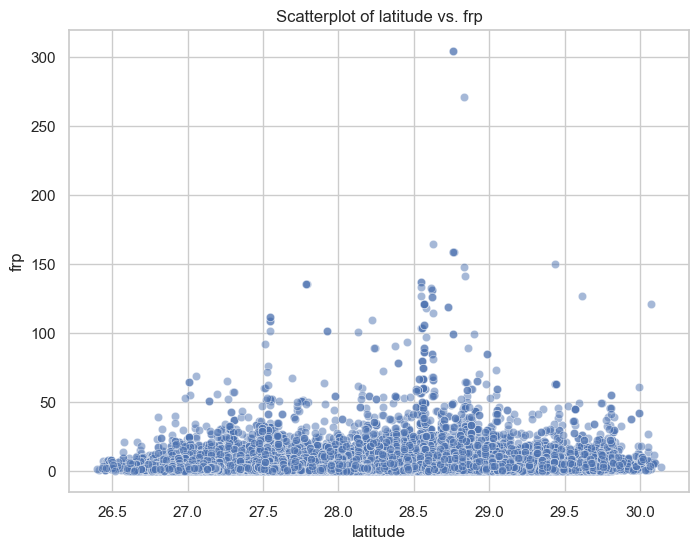

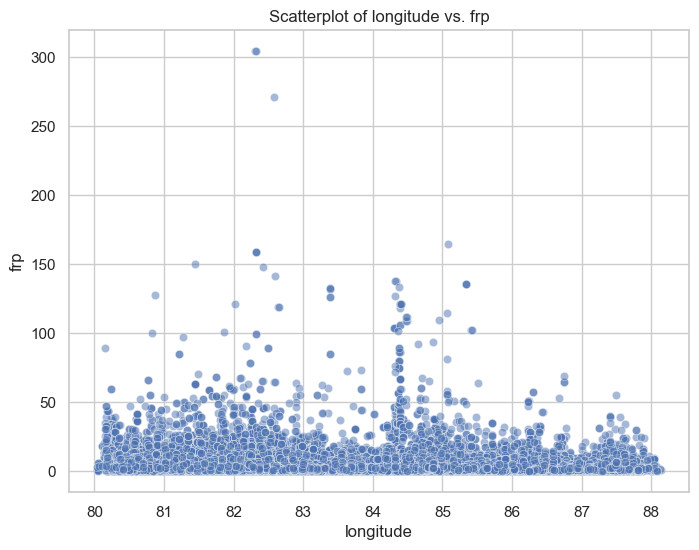

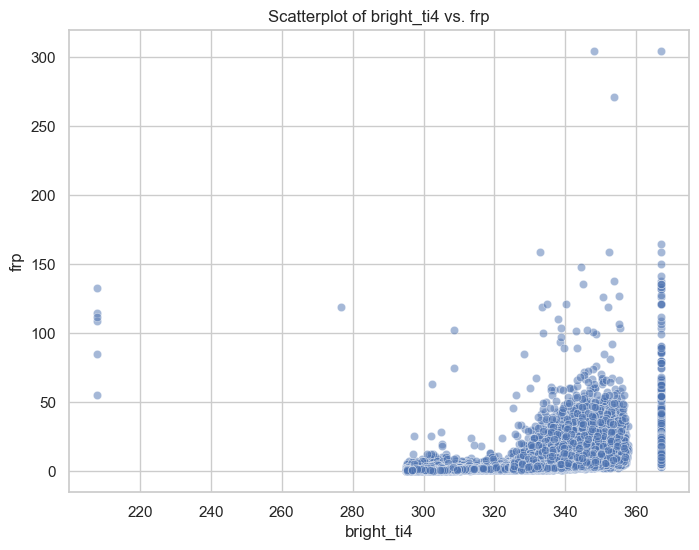

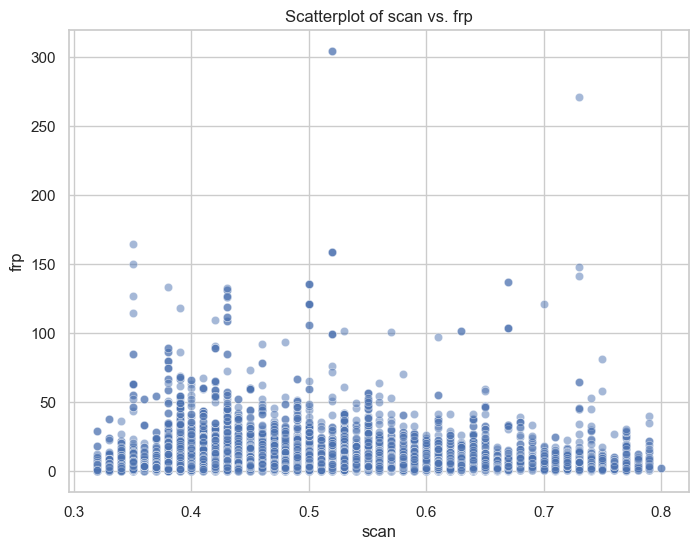

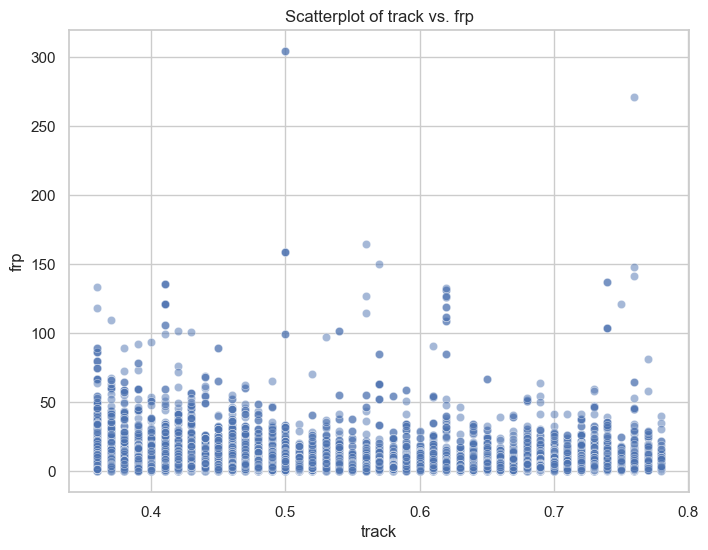

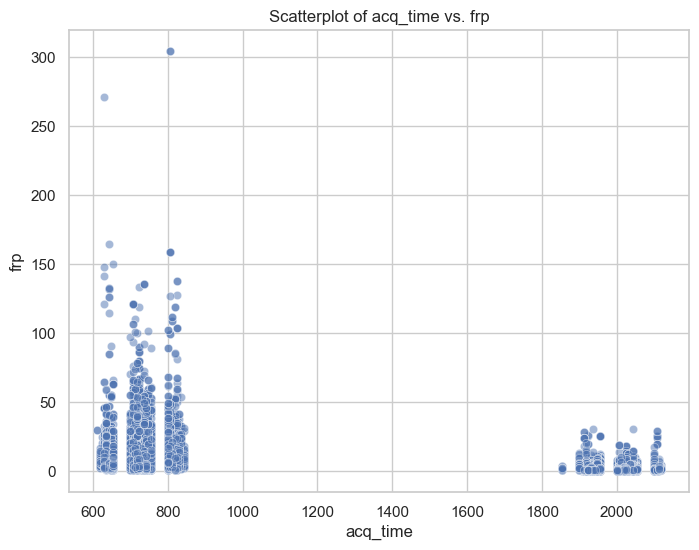

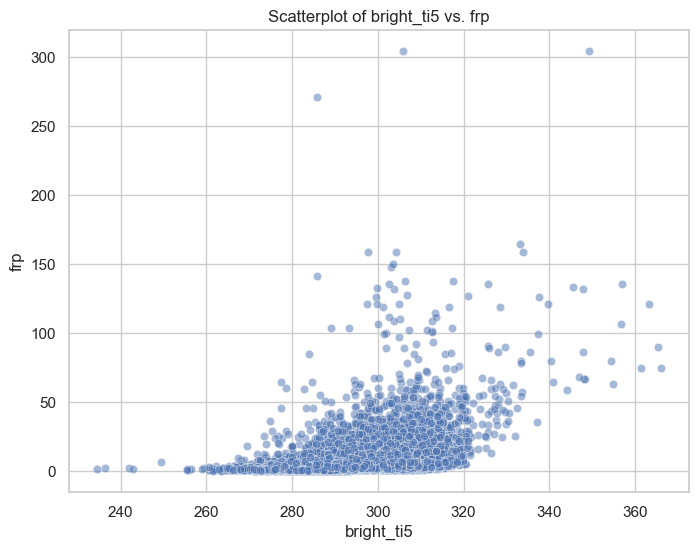

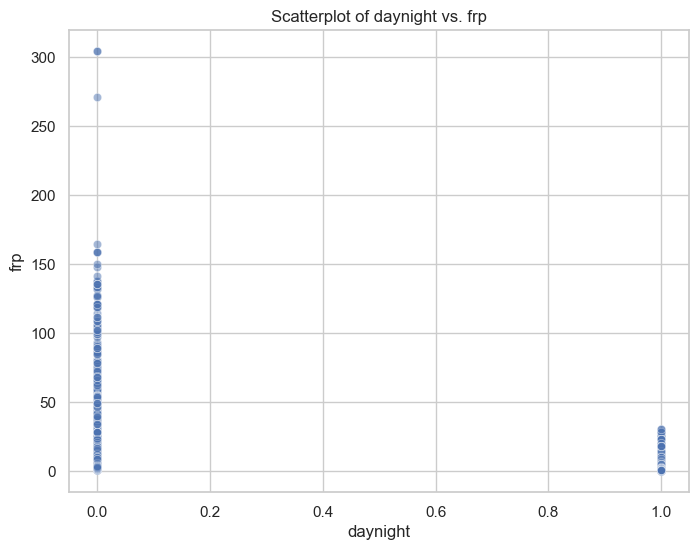

In [62]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' in DataFrame
sns.set(style="whitegrid")  # Set a style for the plots

# List of many features except 'frp'
features = ['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_time', 'bright_ti5', 'daynight',]

# Create scatterplots
for feature in features:
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.scatterplot(data=data, x=feature, y='frp', alpha=0.5)  # Create the scatterplot
    plt.title(f'Scatterplot of {feature} vs. frp')  # Set the title
    plt.xlabel(feature)  # Label for the x-axis
    plt.ylabel('frp')  # Label for the y-axis
    plt.show()  # Show the plot


In [63]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [64]:
#split the data into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train_encoded = pd.get_dummies(X_train, columns=['fire_status'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['fire_status'], drop_first=True)


In [65]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [66]:
#Predection the Model
y_pred = model.predict(X_test)


In [67]:
#Necesary metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 27.03689357471777
R-squared: 0.3306945950676521


In [ ]:
# Assuming  DataFrame with a numerical column 'x'
df['fire_status'] = np.where(df['frp'] > 10, 'Fire', 'Not Fire')


In [74]:
# Step 2: Classification
# Classify instances as "Fire" or "Not Fire" based on 'frp' predictions
threshold = 8  # Define the threshold value

data['fire_status'] = np.where(data['frp'] > threshold, 'Fire', 'Not Fire')

# Separate 'fire_status' as the target variable for classification
y_classification = data['fire_status']
X_classification = data[['latitude', 'longitude', 'bright_ti4', 'scan', 'track', 'acq_time', 'bright_ti5']]

# Split the data into training and testing sets for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Evaluate the accuracy of the classification
classification_accuracy = accuracy_score(y_test_cls, np.where(y_pred > threshold, 'Fire', 'Not Fire'))
print("Classification Accuracy:", classification_accuracy)

Classification Accuracy: 0.9047382372432075
